In [1]:
from instrument import *
from measure import *
import holoviews as hv
hv.extension('bokeh')

ModuleNotFoundError: No module named 'pymeasure'

In [2]:
mock = MockWrapper('qpc')
mock2 = MockWrapper('gate')
mockmes = MockMeasure('G')
mockmes2 = MockMeasure('T')

INFO:pymeasure.instruments.instrument:Initializing Mock instrument.
INFO:pymeasure.instruments.instrument:Initializing Mock instrument.


In [3]:
mock.output_voltage

0

In [4]:
mock.ramp(2)

In [5]:
mock2._name

'gate'

In [6]:
mes = Measurement()

In [7]:
mes.addInstrument(mock)
mes.addInstrument(mock2)

In [8]:
mes.addInstrument(mockmes)
mes.addInstrument(mockmes2)

In [9]:
mes.sweep('qpc', 0, 10, 10, ['G', 'T'])

:DynamicMap   []
   :Layout
      .Curve.I  :Curve   [qpc]   (G)
      .Curve.II :Curve   [qpc]   (T)

In [10]:
mes.sweep2D('qpc', 0, 10, 10, 'gate', 5, 15, 10, 'G')

:DynamicMap   []
   :Image   [qpc,gate]   (G)

In [7]:
mes.sweep2D('qpc', 0, 10, 10, 'gate', 5, 15, 10, ['G', 'T'])

:DynamicMap   []
   :Layout
      .Image.I  :Image   [qpc,gate]   (G)
      .Image.II :Image   [qpc,gate]   (T)

Exception in thread Thread 1:
Traceback (most recent call last):
  File "C:\Users\wpous\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\wpous\OneDrive\Research\Research\DGG\PythonMeasurementCode\QDotsPythonCode\plotting.py", line 214, in run
    data = self.save2D(img,1, xmin, xmax, 2, ymin, ymax)
  File "C:\Users\wpous\OneDrive\Research\Research\DGG\PythonMeasurementCode\QDotsPythonCode\plotting.py", line 48, in save2D
    curr_state = self.qd._convertDF()
AttributeError: 'PlottingThread' object has no attribute 'qd'



In [13]:
mock.output_voltage

10.0

Exception in thread Thread 0:
Traceback (most recent call last):
  File "C:\Users\wpous\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\wpous\OneDrive\Research\Research\DGG\PythonMeasurementCode\QDotsPythonCode\plotting.py", line 282, in run
    data = self.save2D(img,1, xmin, xmax, 2, ymin, ymax)
  File "C:\Users\wpous\OneDrive\Research\Research\DGG\PythonMeasurementCode\QDotsPythonCode\plotting.py", line 44, in save2D
    curr_state = self.qd._convertDF()
AttributeError: 'PlottingThread' object has no attribute 'qd'



In [19]:
import numpy as np

In [38]:
def _convertInstruments(channels):
    """Convert list of names of instruments or channels into a list of the respective objects"""
    input_type = type(channels)
    if input_type in {np.ndarray, list, tuple}:
        if len(channels) == 1:
            return channels[0]
        return np.append(channels[0], _convertInstruments(channels[1:]))
    else:
        return np.array([channels])

In [39]:
b = ['a', 'b','d']

In [40]:
c = _convertInstruments(4)

In [43]:
_convertInstruments([2,3,4])

array([2, 3, 4])

In [41]:
c

array([4])

In [44]:
for i in c:
    print(i)

4


In [33]:
img = hv.Curve(([1,2,3], [3,9,12])) * hv.Curve(([1,2,3], [4,12,22]))

In [35]:
img.options({'Curve': {'color': hv.Cycle('Colorblind')}})

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

In [14]:
c = hv.Curve(([1,2,3], [3,9,12]))

In [28]:
hv.Cycle('default_colors').values

['#30a2da',
 '#fc4f30',
 '#e5ae38',
 '#6d904f',
 '#8b8b8b',
 '#17becf',
 '#9467bd',
 '#d62728',
 '#1f77b4',
 '#e377c2',
 '#8c564b',
 '#bcbd22']

In [26]:
c +=  hv.Curve(([1,2,3], [3,9,12]))

TypeError: unsupported operand type(s) for +=: 'int' and 'Curve'

In [8]:
ls = np.linspace(0, 10, 200)
xx, yy = np.meshgrid(ls, ls)

bounds=(-1,-1,1,1)   # Coordinate system: (left, bottom, top, right)
img = hv.Image(np.sin(xx)*np.cos(yy), bounds=bounds)
img

:Image   [x,y]   (z)

In [9]:
img + img

:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)

## Testing with qcodes environment

In [1]:
class MockWrapper():
    #_defName = 'mock'
    
    def __init__(self, name = 'mock'):
        #super().__init__()
        self._name = name
        self._multiChannel = False
        self.output_voltage  = 0
        
    def ramp(self, volt):
        self.output_voltage = volt
        
        
class MockMeasure:
    def __init__(self, name = 'measure'):
        self._name = name
        self._multiChannel = False
    
    def measure(self):
        return np.random.randn(1)[0]

In [1]:
import qcodes as qc

# In this tutorial, we import the dummy instrument
from qcodes.tests.instrument_mocks import DummyInstrument

dac = DummyInstrument(name="dac", gates=['ch1', 'ch2'])  # The DAC voltage source
dmm = DummyInstrument(name="dmm", gates=['voltage'])  # The DMM voltage reader

# the default dummy instrument returns always a constant value, in the following line we make it random
# just for the looks 💅
import random
dmm.voltage.get =  lambda: random.randint(0, 100)

In [2]:
dac.set('ch1', 2)

In [1]:
from qcodes.tests.instrument_mocks import DummyInstrument

class MockWrapper(DummyInstrument):
    #_defName = 'mock'
    
    def __init__(self, name = 'mock', gates =['ch1']):
        super().__init__(name, gates)
        self._name = name
        self._multiChannel = False
        self.gates = gates
        
    def ramp(self, volt):
        self.set(self.gates[0], volt)
        
        
class MockMeasure(DummyInstrument):
    def __init__(self, name = 'measure', gates=['voltage']):
        super().__init__(name, gates)
        self._name = name
        self._multiChannel = False
        self.gates = gates
    
    def measure(self):
        return np.random.randn(1)[0]+self.get(self.gates[0])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
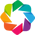

In [2]:
#from instrument import *
from measure import *

import holoviews as hv
hv.extension('bokeh')

In [5]:
from qdevil_code import *
qdc = qdacWrapper()
#mes.addInstrument(qdc)

In [6]:
mock = MockWrapper('qpc')
mock2 = MockWrapper('gate')
mockmes = MockMeasure('G')
mockmes2 = MockMeasure('T')

KeyError: 'Another instrument has the name: qpc'

In [7]:
mes = Measurement()
mes.addInstrument(mock)
mes.addInstrument(mock2)
mes.addInstrument(mockmes)
mes.addInstrument(mockmes2)
mes.addInstrument(qdc)

In [7]:
mes.sweep('qpc', 0, 10, 10, ['G', 'T'])

:DynamicMap   []
   :Layout
      .Curve.I  :Curve   [qpc]   (G)
      .Curve.II :Curve   [qpc]   (T)

In [ ]:
display(mes.currentState)

In [8]:
mes.readableCurrentState()

qpc:
	parameter value
--------------------------------------------------------------------------------
IDN :	None 
ch1 :	0 (V)


gate:
	parameter value
--------------------------------------------------------------------------------
IDN :	None 
ch1 :	0 (V)


G:
	parameter value
--------------------------------------------------------------------------------
IDN     :	None 
voltage :	0 (V)


T:
	parameter value
--------------------------------------------------------------------------------
IDN     :	None 
voltage :	0 (V)


qdac:



Channel Name  Voltage
Channel 1                      0
Channel 2                      0
Channel 3                      0
Channel 4                      0
Channel 5                      0
Channel 6                      0
Channel 7                      0
Channel 8                      0
Channel 9                      0
Channel 10                     0
Channel 11                     0
Channel 12                     0
Channel 13                     0
Channel 14                     0
Channel 15                     0
Channel 16                     0
Channel 17                     0
Channel 18                     0
Channel 19                     0
Channel 20                     0
Channel 21                     0
Channel 22                     0
Channel 23                     0
Channel 24                     0
Channel 25                     0
Channel 26                     0
Channel 27                     0
Channel 28                     0
Channel 29                     0
Channel 30                     0
Channel 31                     0
Channel 32                     0
Channel 33                     0
Channel 34                     0
Channel 35                     0
Channel 36                     0
Channel 37                     0
Channel 38                     0
Channel 39                     0
Channel 40                     0
Channel 41                     0
Channel 42                     0
Channel 43                     0
Channel 44                     0
Channel 45                     0
Channel 46                     0
Channel 47                     0
Channel 48                     0

In [11]:
import pandas as pd
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
print(df.to_html)

<bound method DataFrame.to_html of    col1  col2
0     1     3
1     2     4>


In [12]:
from IPython.display import display

In [14]:
display(df)
df

col1  col2
0     1     3
1     2     4

col1  col2
0     1     3
1     2     4

In [7]:
from qdevil_code import *

In [8]:
qdc = qdacWrapper()

In [9]:
mes.addInstrument(qdc)